# **14. Naive Bayes II - Spam Detection & Wine Quality Classification**

The core assumption of Naive Bayes is that **features are conditionally independent** given the class label. This means that, when making a prediction, Naive Bayes assumes that the presence or absence of a feature is independent of the presence or absence of any other feature, as long as we know the class label.

To put it more simply, the algorithm assumes that each feature provides independent information about the class, and therefore, you can calculate the likelihood of the data as the product of the individual probabilities of each feature, conditioned on the class.

Mathematically, this assumption is written as:

$$
P(X | C) = P(x_1, x_2, \dots, x_n | C) = \prod_{i=1}^{n} P(x_i | C)
$$

Here’s what this formula means:

- $ P(X | C) $ is the likelihood of the features $ X = (x_1, x_2, \dots, x_n) $ given the class label $ C $. This is the probability of observing the feature values $ x_1, x_2, \dots, x_n $ for a given class $ C $.
  
- The assumption of conditional independence means that the joint probability of observing all the features given the class $ C $ can be simplified to the **product** of individual probabilities for each feature $ x_i $, given the class $ C $. This is the essence of Naive Bayes.

- $ P(x_i | C) $ is the **probability** of observing a particular feature $ x_i $, given the class label $ C $.

So, instead of calculating the joint probability for all features simultaneously (which is often complex), Naive Bayes simplifies the calculation by assuming that each feature contributes independently to the likelihood of the class, and we multiply these individual probabilities together.

### Example

Let’s consider a simple example with two features and two classes (e.g., “Spam” or “Not Spam” for email classification).

Suppose:
- Feature 1: “Contains word ‘free’” $ x_1 $.
- Feature 2: “Contains word ‘money’” $ x_2 $.

We want to compute the probability of the email being spam $ P(\text{Spam} | x_1, x_2) $.

Naive Bayes simplifies this to:

$$
P(\text{Spam} | x_1, x_2) \propto P(\text{Spam}) \cdot P(x_1 | \text{Spam}) \cdot P(x_2 | \text{Spam})
$$

This assumes that the two features $ x_1 $ and $ x_2 $ are independent given the class “Spam,” so we can multiply the probabilities of each feature independently (given the class) to find the likelihood of the class.

This simplification makes the Naive Bayes classifier computationally efficient and easy to use, even though the assumption of conditional independence is often unrealistic in real-world data. Despite this, it can still perform surprisingly well in many applications, like spam detection and text classification.

## **1. Spam Detection:**

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [ ]:
# 1. Load the dataset
url = "https://raw.githubusercontent.com/codebasics/py/refs/heads/master/ML/14_naive_bayes/spam.csv"
df = pd.read_csv(url)
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# 2. Some data investigation: group by spam/not spam
df.groupby('Category').describe()

# About 4825 Ham (not spam) emails, and 747 Spam emails

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [ ]:
# 3. Convert Spam/Ham into 1/0
df['spam_n'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)
df.head()

,Category,Message,spam_n
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
# 4. Create test-train split
X_train, X_test, y_train, y_test = train_test_split(df.Message, df.spam_n)

## **2. CountVectorizer()**
The `CountVectorizer()` function is used on dataframes that contain texts. It builds a matrix using unique words in a document/sentence. The columns represent the words used in a sentence, and the rows represent the frequency of each word used in a sentence.


|                | Word 1 | Word 2 | Word 3 | ... | Word k |
|----------------|--------|--------|--------|-----|--------|
| Sentence 1 Freq|   x11  |   x12  |   x13  | ... |   x1k  |
| Sentence 2 Freq|   x21  |   x22  |   x23  | ... |   x2k  |
| Sentence 3 Freq|   x31  |   x32  |   x33  | ... |   x3k  |
|      ...       |   ...  |   ...  |   ...  | ... |   ...  |
| Sentence n Freq|   xn1  |   xn2  |   xn3  | ... |   xnk  |

`CountVectorizer()` goes through each sentence/document and counts the occurences for each of the word, in each sentence.


In [ ]:
# 4. Use a CountVectorizer()
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values) # Use .fit_transform() on training data
X_train_count.toarray()[:2]



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# 5. Fit a Naive Bayes Multinomial
mnb = MultinomialNB()
mnb.fit(X_train_count, y_train)

MultinomialNB()

In [ ]:
# 6. Test on sample data
emails_count = v.transform([
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
])
mnb.predict(emails_count)

# 1st email correctly identified as a ham
# 2nd email correctly identified as a spam

array([0, 1])

In [ ]:
# 7. Test on the Test data and check for accuracy
X_test_count = v.transform(X_test)  # Use .transform() on test data
mnb.score(X_test_count, y_test)

0.9777458722182341

## **3. Pipelining:

Sklean allows us to define a $ pipeline $ of transformations. Recall that we are:

1. Transforming and fitting our raw data to convert text to count-vector
2. Fitting the model on the counter using Naive Bayes

In [ ]:
# 8. Create a pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()), # first transformation: convert text to count-vector
    ('nb', MultinomialNB()) # second transformation: fit a Multinomial Naive Bayes model
])

In [ ]:
# 9. Pipeline the model fitting
clf.fit(X_train, y_train)


Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [ ]:
# 10. Check predictions
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
clf.predict(emails)

array([0, 1])

In [ ]:
# 11. Check accuracy
clf.score(X_test, y_test)

0.9777458722182341

In [ ]:
# 12. Create a confusion matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[1194,    9],
       [  22,  168]])

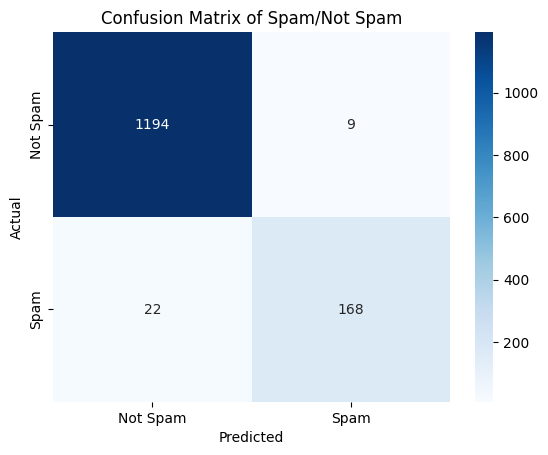

In [ ]:
# 13. Create a seaborn heatmap
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd',
            xticklabels=['Not Spam', 'Spam'],
            yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Spam/Not Spam')
plt.show()

## **4. Summary:**

### Confusion Matrix Interpretation
|                | **Predicted Ham** | **Predicted Spam** |
|----------------|-------------------|--------------------|
| **Actual Ham** |       1194        |          9         |
| **Actual Spam**|        22         |         168        |

### Explanation:
- **1194 (True Negative)**: Correctly identified as **ham** (not spam).
- **9 (False Positive)**: Incorrectly identified as **spam** when it was actually **ham**.
- **22 (False Negative)**: Incorrectly identified as **ham** when it was actually **spam**.
- **168 (True Positive)**: Correctly identified as **spam**.

### Summary Statistics:
1. **Accuracy**: The overall correctness of the model.
   $
   \text{Accuracy} = \frac{\text{(True Positive + True Negative)}}{\text{Total}} = \frac{1194 + 168}{1194 + 9 + 22 + 168} = \frac{1362}{1393} \approx 0.978 \, (\text{or } 97.8\%)
   $

2. **Precision (for Spam)**: The proportion of predicted spam that is actually spam.
   $
   \text{Precision} = \frac{\text{True Positive}}{\text{True Positive + False Positive}} = \frac{168}{168 + 9} \approx 0.949 \, (\text{or } 94.9\%)
   $

3. **Recall (Sensitivity for Spam)**: The proportion of actual spam that is correctly identified.
   $
   \text{Recall} = \frac{\text{True Positive}}{\text{True Positive + False Negative}} = \frac{168}{168 + 22} \approx 0.884 \, (\text{or } 88.4\%)
   $

4. **F1 Score**: The harmonic mean of precision and recall, useful for imbalanced datasets.
   $
   \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision + Recall}} \approx 2 \times \frac{0.949 \times 0.884}{0.949 + 0.884} \approx 0.916 \, (\text{or } 91.6\%)
   $

### Conclusion:
- **High Accuracy (97.8%)**: The model performs well overall.
- **High Precision (94.9%)**: The model is good at identifying spam with few false alarms.
- **Moderate Recall (88.4%)**: The model misses some spam emails but correctly identifies most of them.

This confusion matrix indicates that the spam classifier is highly accurate and precise, with a good balance between identifying spam correctly and not misclassifying ham emails.

## **2. Wine Quality Classification:**

In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [3]:
# 1. Load dataset
wine = load_wine()
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [22]:
# 2. Investigate dataset and create Input matrix
input_df = pd.DataFrame(wine.data, columns = wine.feature_names)
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [23]:
# 3. Create target vector
target_df = pd.DataFrame(wine.target, columns = ['target'])
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   target  178 non-null    int64
dtypes: int64(1)
memory usage: 1.5 KB


In [24]:
# 4. Create test-train split
X_train, X_test, y_train, y_test = train_test_split(input_df, target_df, test_size = 0.2, random_state = 42)

In [25]:
# 5. Initialize Multinomial and Gaussian Naive Bayes objects
mnb = MultinomialNB()
gnb = GaussianNB()

In [29]:
# 6. Fit the models and evaluate the scores
mnb.fit(X_train, y_train)
gnb.fit(X_train, y_train)

for model in [mnb, gnb]:
  score = round(model.score(X_test, y_test), 2)
  print(f"{model.__class__.__name__}: {score}")

MultinomialNB: 0.89
GaussianNB: 1.0


In [30]:
# 7. Create confusion matrix for Multinomial Naive Bayes
y_pred = mnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 0, 13,  1],
       [ 2,  1,  5]])

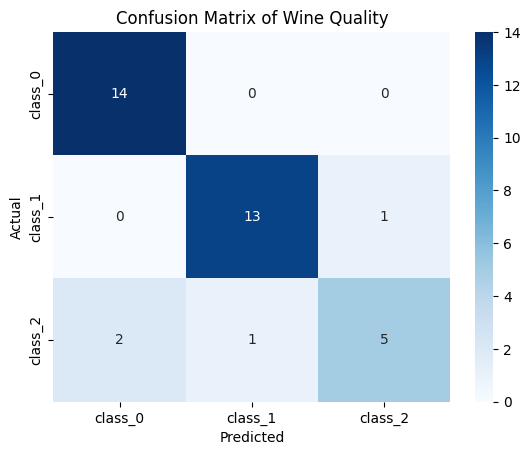

In [32]:
# 8. Create a Seaborn heatmap
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd',
            xticklabels = wine.target_names,
            yticklabels = wine.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Wine Quality')
plt.show()